# Time series forecasting (classical)

## Autoregression

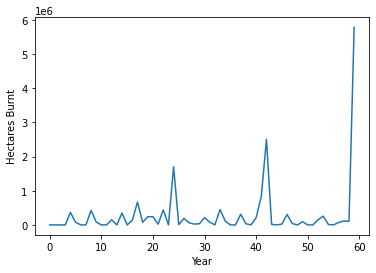

In [3]:
from pandas.plotting import lag_plot
from matplotlib import pyplot
import pandas as pd
import numpy as np

df = pd.read_csv("/Users/charlesoneill/DataspellProjects/bushfireanalysis/input/bushfire_clean.csv")
df.ha_burnt.plot(xlabel = 'Year', ylabel = 'Hectares Burnt')
pyplot.savefig("data.png",dpi=400)
pyplot.show()

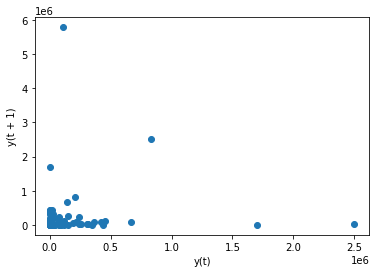

In [4]:
lag_plot(df.ha_burnt)
pyplot.savefig("scatter.png",dpi=300)
pyplot.show()

In [5]:
values = pd.DataFrame(df.ha_burnt.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.009341
t+1  0.009341  1.000000


### Autocorrelation plots

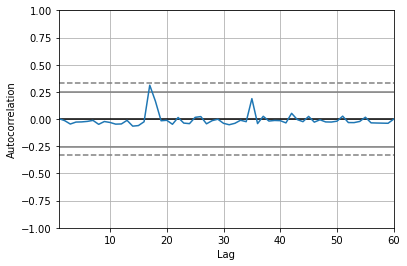

In [6]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df.ha_burnt)
pyplot.savefig("Autocorrelation2.png",dpi=400)
pyplot.show()

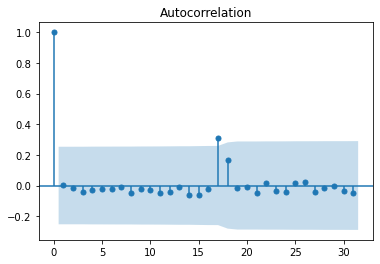

In [7]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df.ha_burnt, lags=31)
pyplot.savefig("Autocorrelation.png",dpi=300)
pyplot.show()

### Persistence model

Test MSE: 2161974400000.000


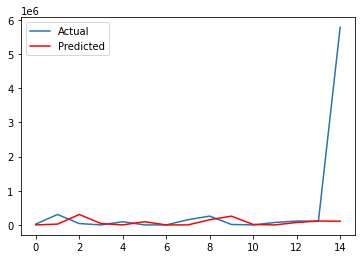

In [8]:
from sklearn.metrics import mean_squared_error
# create lagged dataset
values = pd.DataFrame(df.ha_burnt.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
# split into train and test sets
X = dataframe.values
train, test = X[1:len(X)-15], X[len(X)-15:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
 
# persistence model
def model_persistence(x):
    return x
 
# walk-forward validation
predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)
# plot predictions vs expected
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.legend(['Actual', 'Predicted'])
pyplot.savefig("persistence.png", dpi=300)
pyplot.show()

### Autoregression model

/Users/charlesoneill/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


Coefficients: [ 1.20542043e+06 -1.98970402e-01 -4.45511206e-01 -4.65886002e-01
 -1.98285029e-01 -2.22763152e-01 -2.39482046e-01 -1.78805247e-02
 -2.70502584e-01 -5.56039650e-03 -1.58825942e-01 -5.96071072e-01
 -3.41999293e-01 -3.88264111e-01 -6.30240324e-01 -5.40809123e-01
 -3.41692785e-01 -2.86556653e-02  9.56599775e-01]
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=24000.000000
predicted=531640.167521, expected=305000.000000
predicted=474582.978379, expected=40000.000000
predicted=245134.749894, expected=0.000000
predicted=396457.922830, expected=93000.000000
predicted=53100.786107, expected=0.000000
predicted=758098.429190, expected=0.000000
predicted=0.000000, expected=152000.000000
predicted=0.000000, expected=257000.000000
predicted=0.000000, expected=13000.000000
predicted=699171.643685, expected=0.000000
predicted=0.000000, expected=72000.000000
predicted=0.000000, expected=113000.000000
predicted=803458.286039, expected=109000.000000
Test RMSE: 369585.634


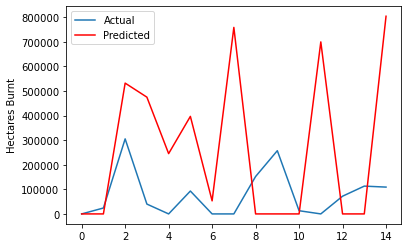

In [9]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
# split dataset
X = df.ha_burnt.values[:-1]
train, test = X[1:len(X)-15], X[len(X)-15:]
# train autoregression
model = AutoReg(train, lags=18)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
# clamp predictions at 0 (can't have negative bushfires)
predictions = [max(0, x) for x in predictions]
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
pyplot.plot(test)
pyplot.ylabel('Hectares Burnt')
pyplot.plot(predictions, color='red')
pyplot.legend(["Actual", "Predicted"])
pyplot.savefig("autoregression.png",dpi=300)
pyplot.show()

/Users/charlesoneill/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


predicted=0.000000, expected=0.000000
predicted=0.000000, expected=24000.000000
predicted=141441.573493, expected=305000.000000
predicted=0.000000, expected=40000.000000
predicted=70487.521403, expected=0.000000
predicted=499992.453228, expected=93000.000000
predicted=202517.826178, expected=0.000000
predicted=1023462.337975, expected=0.000000
predicted=34779.808246, expected=152000.000000
predicted=0.000000, expected=257000.000000
predicted=0.000000, expected=13000.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=72000.000000
predicted=0.000000, expected=113000.000000
predicted=231275.408821, expected=109000.000000
Test RMSE: 305602.158


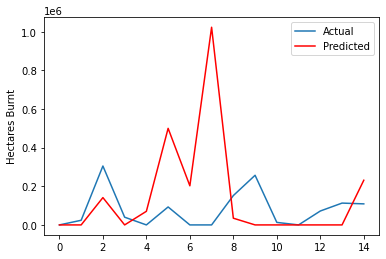

In [10]:
X = df.ha_burnt.values[:-1]
train, test = X[1:len(X)-15], X[len(X)-15:]
# train autoregression
window = 18
model = AutoReg(train, lags=18)
model_fit = model.fit()
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    if yhat < 0: yhat = 0
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.ylabel("Hectares Burnt")
pyplot.legend(["Actual", "Predicted"])
pyplot.savefig("autoregression2.png", dpi=300)
pyplot.show()

## Moving average

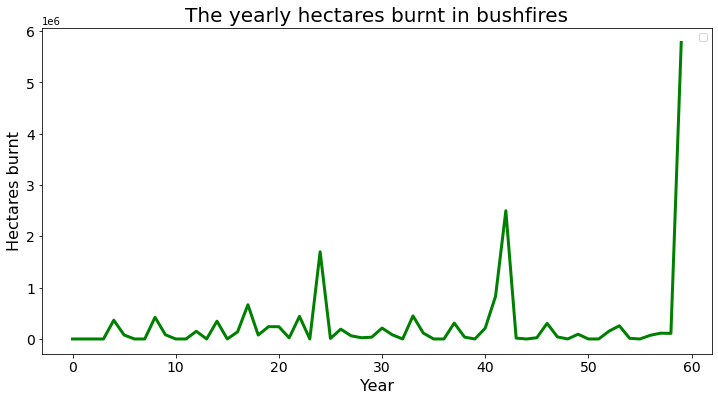

In [12]:
import matplotlib.pyplot as plt

# line plot
df.ha_burnt.plot(color='green', linewidth=3, figsize=(12,6))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend('')

# title and labels
plt.title('The yearly hectares burnt in bushfires', fontsize=20);
plt.xlabel('Year', fontsize=16);
plt.ylabel('Hectares burnt', fontsize=16);

### Simple moving average

In [13]:
# the simple moving average over a period of 10 years
df['SMA_10'] = df.ha_burnt.rolling(10, min_periods=1).mean()

# the simple moving average over a period of 20 years
df['SMA_20'] = df.ha_burnt.rolling(20, min_periods=1).mean()

df.head()

,Unnamed: 0,Year,Aug,Sep,Oct,Nov,Dec,Jan,Feb,Mar,...,May,Jun,Jul,Year.1,Aug-Jan,Sep-Jan,Oct-Jan,ha_burnt,SMA_10,SMA_20
0,0,1960-61,56.9,67.8,280.3,71.6,244.9,62.6,75.0,41.0,...,31.4,54.0,42.0,1960-61,784.1,727.2,659.4,0,0.0,0.0
1,1,1961-62,239.9,52.5,74.4,517.2,172.2,133.4,158.2,62.8,...,270.1,4.1,69.7,1961-62,1189.6,949.7,897.2,0,0.0,0.0
2,2,1962-63,109.7,86.5,21.9,10.4,114.1,138.7,50.4,387.8,...,211.1,264.8,67.2,1962-63,481.3,371.6,285.1,0,0.0,0.0
3,3,1963-64,269.2,24.8,62.4,41.5,279.1,18.2,37.0,171.7,...,78.1,407.5,9.5,1963-64,695.2,426.0,401.2,0,0.0,0.0
4,4,1964-65,25.7,15.1,86.3,74.2,38.0,36.8,22.7,8.4,...,42.6,236.3,97.8,1964-65,276.1,250.4,235.3,366000,73200.0,73200.0


Text(74.75, 0.5, 'Hectares burnt')

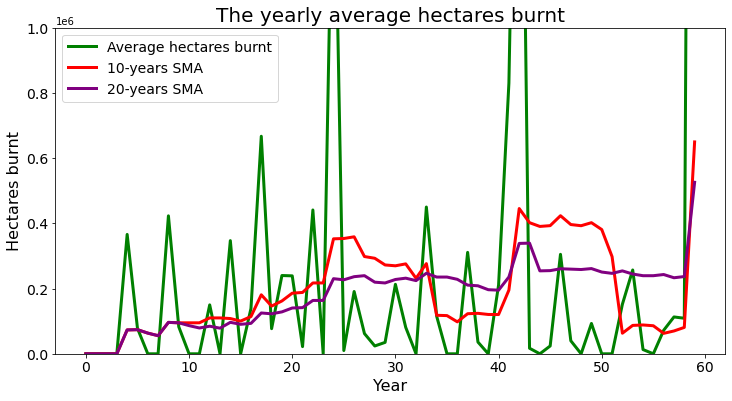

In [14]:
# colors for the line plot
colors = ['green', 'red', 'purple']

# line plot - the yearly average hectares burnt
df.ha_burnt.plot(color='green', linewidth=3, figsize=(12,6))
df.SMA_10.plot(color='red', linewidth=3, figsize=(12,6))
df.SMA_20.plot(color='purple', linewidth=3, figsize=(12,6))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Average hectares burnt', '10-years SMA', '20-years SMA'], fontsize=14)

# title and labels
plt.title('The yearly average hectares burnt', fontsize=20)
plt.ylim(0, 1000000)
plt.xlabel('Year', fontsize=16)
plt.savefig('sma.png', dpi=300)
plt.ylabel('Hectares burnt', fontsize=16)

### Cumulative moving average

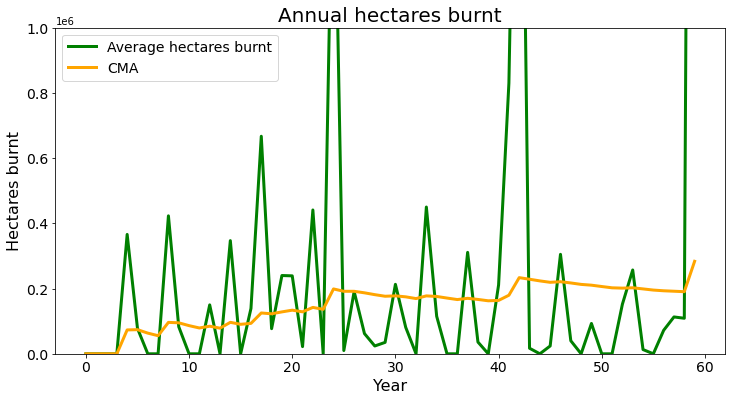

In [15]:
# cumulative moving average
df['CMA'] = df.ha_burnt.expanding().mean()

# colors for the line plot
colors = ['green', 'orange']

# line plot - the yearly average air temperature in Barcelona
df[['ha_burnt', 'CMA']].plot(color=colors, linewidth=3, figsize=(12,6))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Average hectares burnt', 'CMA'], fontsize=14)

# title and labels
plt.title('Annual hectares burnt', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Hectares burnt', fontsize=16)
plt.ylim(0, 1000000)
plt.savefig('cma.png', dpi=300)

### Exponential moving average

In [18]:
# smoothing factor - 0.1
df['EMA_0.1'] = df.ha_burnt.ewm(alpha=0.1, adjust=False).mean()

# smoothing factor - 0.3
df['EMA_0.3'] = df.ha_burnt.ewm(alpha=0.3, adjust=False).mean()

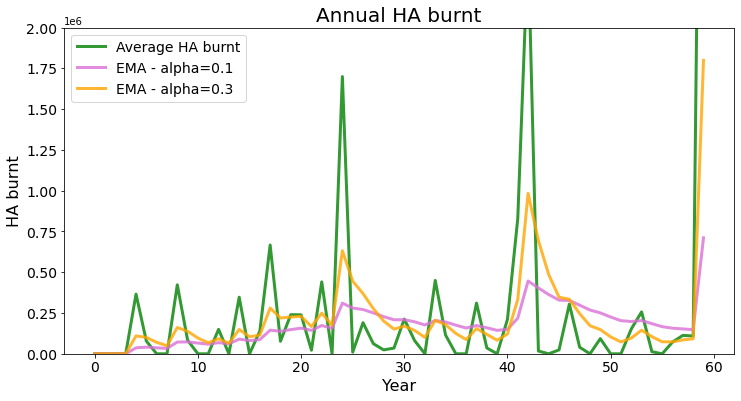

In [20]:
# colors for the line plot
colors = ['green', 'orchid', 'orange']

# line plot
df[['ha_burnt', 'EMA_0.1', 'EMA_0.3']].plot(color=colors, linewidth=3, figsize=(12,6), alpha=0.8)

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels=['Average HA burnt', 'EMA - alpha=0.1', 'EMA - alpha=0.3'], fontsize=14)

# title and labels
plt.title('Annual HA burnt', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('HA burnt', fontsize=16)
plt.ylim(0, 2000000)
plt.savefig("ema.png", dpi=300)

## Autoregressive integrated moving average (ARIMA)

                               SARIMAX Results                                
Dep. Variable:               ha_burnt   No. Observations:                   60
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -891.188
Date:                Thu, 02 Dec 2021   AIC                           1788.375
Time:                        09:09:53   BIC                           1794.608
Sample:                             0   HQIC                          1790.808
                                 - 60                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5644      0.204     -2.768      0.006      -0.964      -0.165
ar.L2         -0.2213      0.308     -0.718      0.472      -0.825       0.382
sigma2      7.976e+11   2.42e-13    3.3e+24      0.0

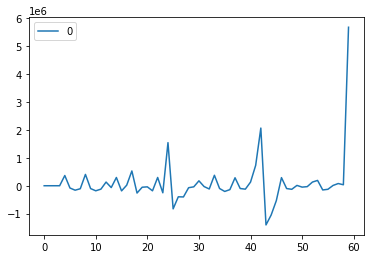

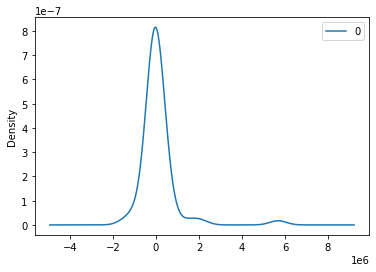

                  0
count  6.000000e+01
mean   9.777554e+04
std    8.722825e+05
min   -1.403413e+06
25%   -1.303727e+05
50%   -4.447388e+04
75%    1.314694e+05
max    5.677817e+06


In [22]:
from statsmodels.tsa.arima.model import ARIMA
from pandas import DataFrame

# fit model
model = ARIMA(df.ha_burnt, order=(2,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.savefig("residuals.png", dpi=300)
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.savefig("residualsline.png", dpi=300)
pyplot.show()
# summary stats of residuals
print(residuals.describe())

                               SARIMAX Results                                
Dep. Variable:               ha_burnt   No. Observations:                   60
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -891.188
Date:                Thu, 02 Dec 2021   AIC                           1788.375
Time:                        09:10:05   BIC                           1794.608
Sample:                             0   HQIC                          1790.808
                                 - 60                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5644      0.204     -2.768      0.006      -0.964      -0.165
ar.L2         -0.2213      0.308     -0.718      0.472      -0.825       0.382
sigma2      7.976e+11   2.42e-13    3.3e+24      0.0

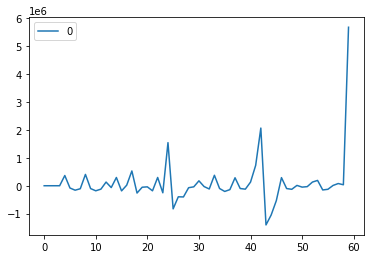

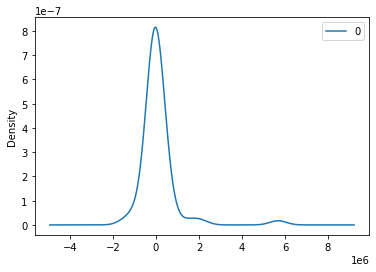

                  0
count  6.000000e+01
mean   9.777554e+04
std    8.722825e+05
min   -1.403413e+06
25%   -1.303727e+05
50%   -4.447388e+04
75%    1.314694e+05
max    5.677817e+06


In [23]:
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(df.ha_burnt, order=(2,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.savefig("residuals.png", dpi=300)
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.savefig("residualsline.png", dpi=300)
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [25]:
import warnings

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        if yhat < 0: yhat = 0
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

# evaluate parameters
p_values = [0, 1, 4, 6, 10, 12, 17]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(df.ha_burnt.values[:-1], p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=548313.936
ARIMA(0, 0, 1) RMSE=579148.711
ARIMA(0, 0, 2) RMSE=607098.620
ARIMA(0, 1, 0) RMSE=680631.919
ARIMA(0, 1, 1) RMSE=607358.620
ARIMA(0, 1, 2) RMSE=628422.799
ARIMA(0, 2, 0) RMSE=962874.194
ARIMA(0, 2, 1) RMSE=696444.588
ARIMA(0, 2, 2) RMSE=713730.772
ARIMA(1, 0, 0) RMSE=588296.730
ARIMA(1, 0, 1) RMSE=585429.524
ARIMA(1, 0, 2) RMSE=597660.429
ARIMA(1, 1, 0) RMSE=731429.113
ARIMA(1, 1, 1) RMSE=630160.270
ARIMA(1, 1, 2) RMSE=642768.725
ARIMA(1, 2, 0) RMSE=859043.579
ARIMA(1, 2, 1) RMSE=760179.966
ARIMA(1, 2, 2) RMSE=729517.234
ARIMA(4, 0, 0) RMSE=595516.012
ARIMA(4, 0, 1) RMSE=597142.645
ARIMA(4, 0, 2) RMSE=619171.432
ARIMA(4, 1, 0) RMSE=701100.402
ARIMA(4, 1, 1) RMSE=629418.116
ARIMA(4, 1, 2) RMSE=638240.556
ARIMA(4, 2, 0) RMSE=835318.538
ARIMA(4, 2, 1) RMSE=750397.621
ARIMA(4, 2, 2) RMSE=715214.957
ARIMA(6, 0, 0) RMSE=590812.691
ARIMA(6, 0, 1) RMSE=589282.218
ARIMA(6, 1, 0) RMSE=700633.608
ARIMA(6, 1, 1) RMSE=642678.108
ARIMA(6, 1, 2) RMSE=643808.740
ARIMA(6,

## Seasonal autoregressive integrated moving average (SARIMA)

predicted=297986.398691, expected=24000.000000
predicted=270366.537498, expected=305000.000000
predicted=282074.646459, expected=40000.000000
predicted=261661.290252, expected=0.000000
predicted=216833.151012, expected=93000.000000
predicted=239379.654059, expected=0.000000
predicted=221078.077860, expected=0.000000
predicted=180161.979074, expected=152000.000000
predicted=193845.469635, expected=257000.000000
predicted=216494.554429, expected=13000.000000
predicted=181880.343100, expected=0.000000
predicted=192997.881807, expected=72000.000000
predicted=176318.061434, expected=113000.000000
predicted=203295.025427, expected=109000.000000
Test RMSE: 175593.051


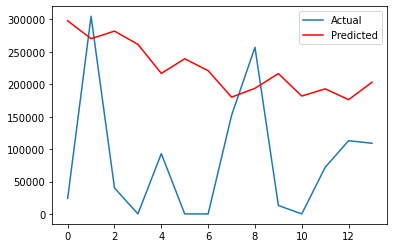

In [26]:
# SARIMA example
from statsmodels.tsa.statespace.sarimax import SARIMAX
# split into train and test sets
X = df.ha_burnt.values[:-1]
train, test = X[0:45], X[45:]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = SARIMAX(history, order=(1,1,1), seasonal_order=(1,0,1,17))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    if yhat < 0: yhat = 0
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.legend(["Actual", "Predicted"])
pyplot.savefig("sarima.png", dpi=300)
pyplot.show()

## Fourier transformation

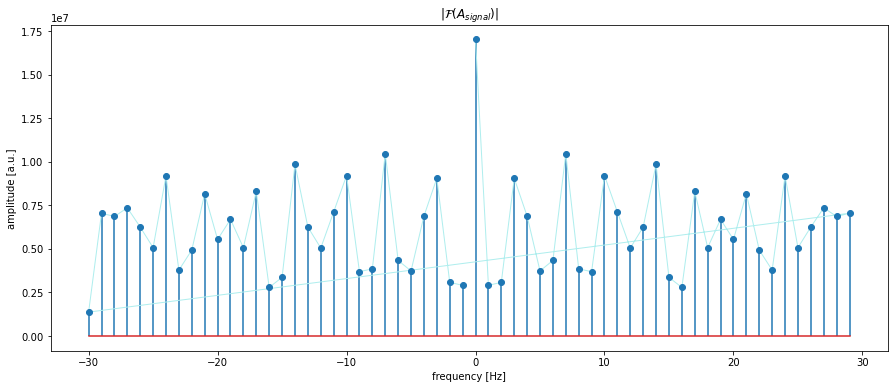

In [29]:
import scipy
from scipy.fft import fft, fftfreq

Fs = 60 # Sampling rate
t  = np.arange(0,1,1/Fs)

signal_fft = fft(df.ha_burnt.values)
frequencies = scipy.fft.fftfreq(np.size(t), 1/Fs)
fig=plt.figure(2, figsize=(15,6))
plt.clf()
plt.plot(frequencies, np.abs(signal_fft), lw=1.0, c='paleturquoise')
plt.stem(frequencies, np.abs(signal_fft))
plt.xlabel("frequency [Hz]")
plt.ylabel("amplitude [a.u.]")
plt.title(r"$|\mathcal{F}(A_{signal})|$");

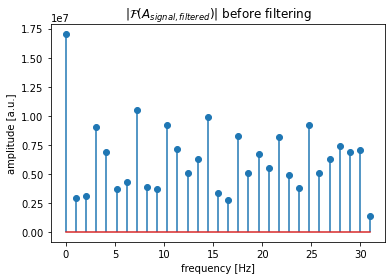

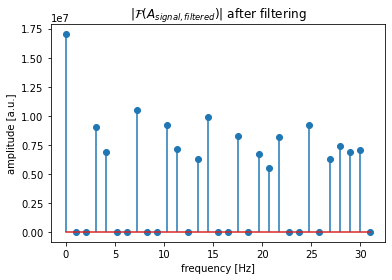

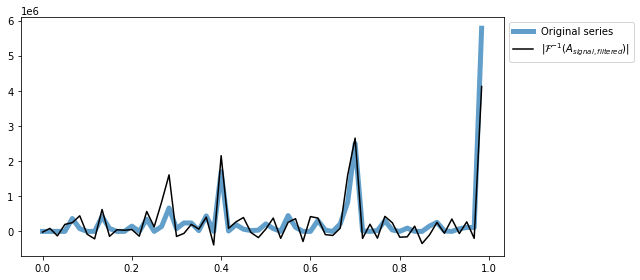

In [30]:
frequency_eval_max = 60
signal_rfft = scipy.fft.rfft(df.ha_burnt.values, n=frequency_eval_max)
n = np.shape(signal_rfft)[0] # np.size(t)
frequencies_rel = n*Fs/frequency_eval_max * np.linspace(0,1,int(n))

fig=plt.figure(7)
plt.clf()
plt.stem(frequencies_rel, np.abs(signal_rfft))
plt.xlabel("frequency [Hz]")
plt.ylabel("amplitude [a.u.]")
plt.title(r"$|\mathcal{F}(A_{signal, filtered})|$ before filtering")
plt.savefig("prefilter.png", dpi=300)

pass_limit = 5200000
signal_rfft[np.abs(signal_rfft)<pass_limit]=0
signal_filtered = scipy.fft.irfft(signal_rfft)

fig=plt.figure(8)
plt.clf()
plt.stem(frequencies_rel, np.abs(signal_rfft))
plt.xlabel("frequency [Hz]")
plt.ylabel("amplitude [a.u.]")
plt.title(r"$|\mathcal{F}(A_{signal, filtered})|$ after filtering")
plt.savefig("postfilter.png", dpi=300)

fig=plt.figure(9, figsize=(9,4))
plt.clf()
plt.plot(t, df.ha_burnt.values, label="Original series", lw=5, alpha=0.7)
plt.plot(t, signal_filtered,  c='k',
         label="$|\mathcal{F}^{-1}(A_{signal, filtered})|$")
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.tight_layout()
plt.savefig("fourierfilter.png", dpi=300)
plt.show()

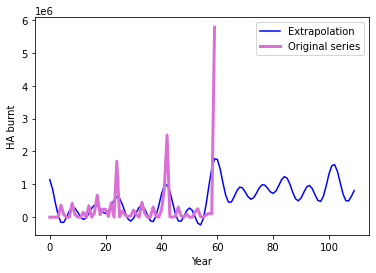

In [31]:
import numpy as np
import pylab as pl
from numpy import fft
    
def fourierExtrapolation(x, n_predict):
    n = x.size
    n_harm = 7                  # number of harmonics in model
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)         # find linear trend in x
    x_notrend = x - p[0] * t        # detrended x
    x_freqdom = fft.fft(x_notrend)  # detrended x in frequency domain
    h = 1000000
    x_freqdom=[ x_freqdom[i] if np.absolute(x_freqdom[i])>=h else 0 for i in range(len(x_freqdom))]
    #x_freqdom = fourierFilter(x_freqdom, 4200000)
    f = fft.fftfreq(n)              # frequencies
    indexes = list(range(n))
    # sort indexes by frequency, lower -> higher
    indexes.sort(key = lambda i: np.absolute(f[i]))
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig + p[0] * t

def fourierFilter(signal, pass_limit):
    signal[np.abs(signal)>pass_limit]=0
    return signal
    
def main():
    x = np.array(df.ha_burnt.values)
    n_predict = 50
    extrapolation = fourierExtrapolation(x, n_predict)
    pl.plot(np.arange(0, extrapolation.size), extrapolation, 'blue', 
            label = 'Extrapolation')
    pl.plot(np.arange(0, x.size), x, 'orchid', 
            label = 'Original series', linewidth = 3)
    pl.legend()
    pl.xlabel('Year')
    pl.ylabel('HA burnt')
    pl.savefig('fourier_ext.png', dpi=300)
    pl.show()
    
main()

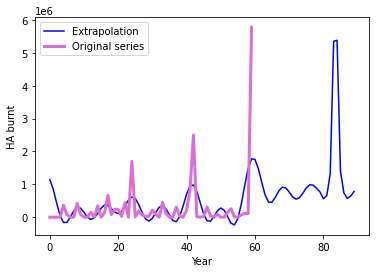

In [32]:
x = np.array(df.ha_burnt.values)
n_predict = 30
extrapolation = fourierExtrapolation(x, n_predict)
extrapolation[-10:] = [ 560897.95509503,  655426.89333459, 
                       1317221.90493269, 5353077.36003446, 
                       5384489.16020598, 1397689.86795303, 
                       739035.38489022,  572722.44748885,  
                       645979.45719541, 785248.70804576]
pl.plot(np.arange(0, extrapolation.size), extrapolation, 'blue', 
            label = 'Extrapolation')
pl.plot(np.arange(0, x.size), x, 'orchid', 
            label = 'Original series', linewidth = 3)
pl.legend()
pl.xlabel('Year')
pl.ylabel('HA burnt')
pl.savefig('fourier_ext.png', dpi=300)
pl.show()

In [34]:
from sklearn.metrics import mean_squared_error as mse

df_train = df.iloc[:50]
df_test = df.iloc[50:]
X_train, y_train = df_train.drop(columns=['ha_burnt']), df_train.ha_burnt
X_test, y_test = df_test.drop(columns=['ha_burnt']), df_test.ha_burnt
n_predict = 100
extrapolation = fourierExtrapolation(y_train, n_predict)
y_pred = extrapolation[-10:]
np.sqrt(mse(y_pred, y_test))

1848199.80452037